### Getting MNIST data

In [22]:
from keras.datasets import mnist

(all_train_images, all_train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
all_train_images.shape

(60000, 28, 28)

In [24]:
all_train_labels.shape

(60000,)

In [25]:
all_train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
test_images.shape

(10000, 28, 28)

In [27]:
test_labels.shape

(10000,)

In [28]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Normalizing

In [29]:
all_train_images = all_train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Splitting train dataset into a train and validation sets

In [30]:
train_images = all_train_images[:50000, :, :]
train_images.shape

(50000, 28, 28)

In [31]:
validation_images = all_train_images[50000:, :, :]
validation_images.shape

(10000, 28, 28)

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
train_labels = all_train_labels[:50000]
train_labels.shape

(50000,)

In [34]:
validation_labels = all_train_labels[50000:]
validation_labels.shape

(10000,)

In [35]:
test_labels.shape

(10000,)

### Reshaping for Dense input 

In [36]:
train_images_mlp = train_images.reshape((50000, 28 * 28))
validation_images_mlp = validation_images.reshape((10000, 28 * 28))
test_images_mlp = test_images.reshape((10000, 28 * 28))

print(train_images_mlp.shape)
print(validation_images_mlp.shape)
print(test_images_mlp.shape)

(50000, 784)
(10000, 784)
(10000, 784)


### One-hot encoding of labels

In [37]:
from keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
validation_labels_one_hot = to_categorical(validation_labels)
test_labels_one_hot = to_categorical(test_labels)

print("train_labels_one_hot.shape:", train_labels_one_hot.shape)
print("validation_labels_one_hot.shape:", validation_labels_one_hot.shape)
print("test_lanels_one_hot:", test_labels_one_hot.shape)

train_labels_one_hot.shape: (50000, 10)
validation_labels_one_hot.shape: (10000, 10)
test_lanels_one_hot: (10000, 10)


## MLP model

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 0s - loss: 0.2831 - acc: 0.9178 - val_loss: 0.1571 - val_acc: 0.9536
Epoch 2/5
50000/50000 [==============================] - 0s - loss: 0.1148 - acc: 0.9657 - val_loss: 0.1035 - val_acc: 0.9701
Epoch 3/5
50000/50000 [==============================] - 0s - loss: 0.0752 - acc: 0.9779 - val_loss: 0.0849 - val_acc: 0.9748
Epoch 4/5
50000/50000 [==============================] - 0s - loss: 0.0545 - acc: 0.9835 - val_loss: 0.0783 - val_acc: 0.9770
Epoch 5/5
50000/50000 [==============================] - 0s - loss: 0.0392 - acc: 0.9884 - val_loss: 0.0893 - val_acc: 0.9743
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


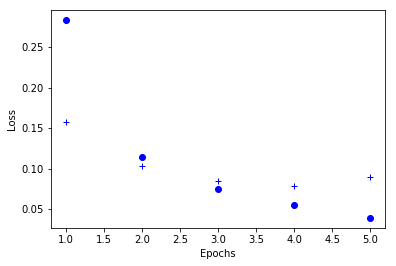

In [38]:
from keras.models import Model
from keras.layers import Input, Dense

inputs = Input(shape=(28 * 28,))
hidden1 = Dense(512, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(hidden1)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_mlp = model.fit(train_images_mlp,
                        train_labels_one_hot,
                        epochs=5,
                        batch_size=128,
                        validation_data=(validation_images_mlp, validation_labels_one_hot))

history_dict = history_mlp.history
print(history_dict.keys())

%matplotlib inline
import matplotlib.pyplot as plt

loss_mlp = history_dict['loss']
val_loss_mlp = history_dict['val_loss']
epochs = range(1, len(loss_mlp) + 1)

plt.plot(epochs, loss_mlp, 'bo')
plt.plot(epochs, val_loss_mlp, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [39]:
test_loss_mlp, test_acc_mlp = model.evaluate(test_images_mlp, test_labels_one_hot)
print("test_loss_mlp:", test_loss_mlp)
print("test_acc_mlp:", test_acc_mlp)

 9184/10000 [==========================>...] - ETA: 0stest_loss_mlp: 0.087796932106
test_acc_mlp: 0.9737


### Reshape for Convolution input with one channel

In [40]:
train_images_chan = train_images.reshape((50000, 28, 28, 1))
validation_images_chan = validation_images.reshape((10000, 28, 28, 1))
test_images_chan = test_images.reshape((10000, 28, 28, 1))

print(train_images_chan.shape)
print(validation_images_chan.shape)
print(test_images_chan.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


## ConvNet model

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s - loss: 0.2235 - acc: 0.9279 - val_loss: 0.0520 - val_acc: 0.9860
Epoch 2/5
50000/50000 [==============================] - 1s - loss: 0.0520 - acc: 0.9840 - val_loss: 0.0453 - val_acc: 0.9866
Epoch 3/5
50000/50000 [==============================] - 1s - loss: 0.0340 - acc: 0.9886 - val_loss: 0.0689 - val_acc: 0.9774
Epoch 4/5
50000/50000 [==============================] - 1s - loss: 0.0258 - acc: 0.9917 - val_loss: 0.0370 - val_acc: 0.9906
Epoch 5/5
50000/50000 [==============================] - 1s - loss: 0.0183 - acc: 0.9942 - val_loss: 0.0345 - val_acc: 0.9908


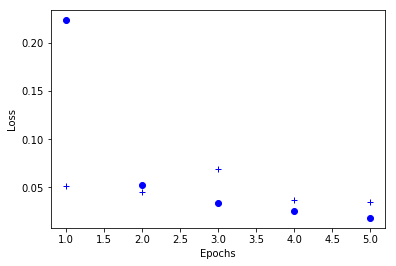

In [41]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, (3, 3), activation='relu')(inputs)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(64, (3, 3), activation='relu')(pool2)
flatten = Flatten()(conv3)
dense1 = Dense(512, activation='relu')(flatten)
outputs = Dense(10, activation='softmax')(dense1)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_conv = model.fit(train_images_chan,
                         train_labels_one_hot,
                         epochs=5,
                         batch_size=128,
                         validation_data=(validation_images_chan, validation_labels_one_hot))

history_dict = history_conv.history

loss_conv = history_dict['loss']
val_loss_conv = history_dict['val_loss']
epochs = range(1, len(loss_conv) + 1)
plt.plot(epochs, loss_conv, 'bo')
plt.plot(epochs, val_loss_conv, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [42]:
test_loss_conv, test_acc_conv = model.evaluate(test_images_chan, test_labels_one_hot)
print("test_loss_conv:", test_loss_conv)
print("test_acc_conv:", test_acc_conv)

 9664/10000 [===========================>..] - ETA: 0stest_loss_conv: 0.0281388300168
test_acc_conv: 0.9911


In [43]:

print("test_acc_mlp vs test_acc_conv:", test_acc_mlp, "vs", test_acc_conv)

test_acc_mlp vs test_acc_conv: 0.9737 vs 0.9911
